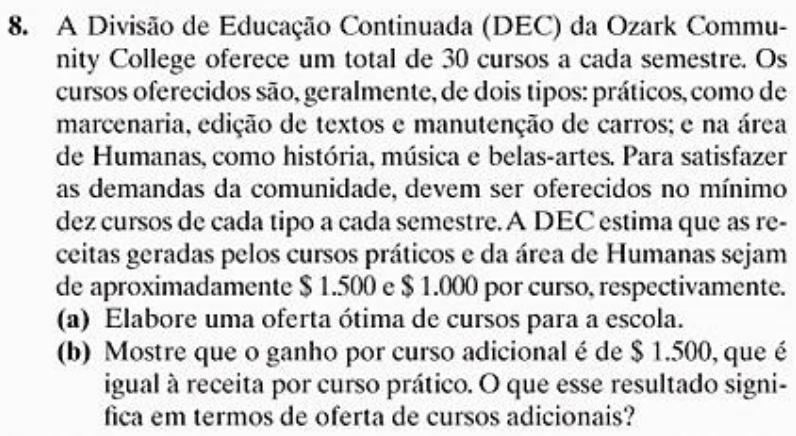

In [1]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Oferta_Otima_Cursos_DEC')

In [3]:
# --- Parâmetros extraídos do enunciado ---

# Nomes dos tipos de curso para referência
tipos_curso = ['pratico', 'humanas']

# Dados financeiros e operacionais
total_de_cursos_ofertados = 30
receita_por_curso = {'pratico': 1500, 'humanas': 1000}
minimo_cursos_por_tipo = 10

In [4]:
# 1. Variáveis de Decisão
# Número de cursos a serem oferecidos de cada tipo
num_cursos = model.integer_var_dict(tipos_curso, name='NumCursos')
# Usamos integer_var_dict pois não se pode oferecer frações de um curso.


# 2. Função Objetivo
# Maximizar a receita total
expressao_receita = (receita_por_curso[t] * num_cursos[t] for t in tipos_curso)
soma_receita_total = model.sum(expressao_receita)
model.maximize(soma_receita_total)


# 3. Restrições

# Restrição 1: Total de Cursos Oferecidos
# A soma dos cursos deve ser exatamente igual a 30.
expressao_total_cursos = (num_cursos[t] for t in tipos_curso)
soma_total_cursos = model.sum(expressao_total_cursos)
restr_total_cursos_logica = soma_total_cursos == total_de_cursos_ofertados
model.add_constraint(restr_total_cursos_logica, ctname='limite_total_cursos')

# Restrição 2: Mínimo de Cursos por Tipo
# O número de cursos de cada tipo deve ser no mínimo 10.
for t in tipos_curso:
    restr_min_cursos_logica = num_cursos[t] >= minimo_cursos_por_tipo
    model.add_constraint(restr_min_cursos_logica, ctname=f'min_cursos_{t}')

In [6]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA (a) ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Tried aggregator 1 time.
MIP Presolve eliminated 3 rows and 2 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.00 ticks)

Root node processing (before b&c):
  Real time             =    0.01 sec. (0.00 ticks)
Parallel b&c, 16 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.01 sec. (0.00 ticks)

------ SOLUÇÃO ÓTIMA (a) ------

solution for: Oferta_Otima_Cursos_DEC
objective: 40000
status: OPTIMAL_SOLUTION(2)
NumCursos_pratico=20
NumCursos_humanas=10

